<a href="https://colab.research.google.com/github/spshreya/Covid-Detector/blob/main/COVID_19_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://www.dropbox.com/s/vynypakezgqkchf/CovidDataset.rar?dl=0

--2020-12-07 15:15:44--  https://www.dropbox.com/s/vynypakezgqkchf/CovidDataset.rar?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vynypakezgqkchf/CovidDataset.rar [following]
--2020-12-07 15:15:44--  https://www.dropbox.com/s/raw/vynypakezgqkchf/CovidDataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0633deecda3afc30db92b57b92.dl.dropboxusercontent.com/cd/0/inline/BEkiCM8BEqA7yx3tc-iCOV-ZB58BqUeh6BHjsRlnh0htH77zSG8X-2IKnKHAC4xCO1cQk0biMooBDQvLEh56pU4J7yb6SG_J4pAzsigKKmoywCYWp4macfxXH8H5xqp3gRQ/file# [following]
--2020-12-07 15:15:45--  https://uc0633deecda3afc30db92b57b92.dl.dropboxusercontent.com/cd/0/inline/BEkiCM8BEqA7yx3tc-iCOV-ZB58BqUeh6BHjsRlnh0htH77zSG8X-2IKnKHAC4xCO1cQk0biMooBDQvLEh56pU4J7yb6SG

In [3]:
!pip install unrar

In [4]:
!unrar x CovidDataset.rar\?dl\=0


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from CovidDataset.rar?dl=0

Creating    CovidDataset                                              OK
Creating    CovidDataset/Train                                        OK
Creating    CovidDataset/Train/Covid                                  OK
Extracting  CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg       0%  OK 
Extracting  CovidDataset/Train/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg       0%  OK 
Extracting  CovidDataset/Train/Covid/0a7faa2a.jpg                          0%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg       0%  1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg       1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg       1%  OK 
Extracting  CovidDataset/Train/Covid/1-s2.0-S1684118220300682-main.p

Accuracy: 0.9791666666666666
Prediction is Normal


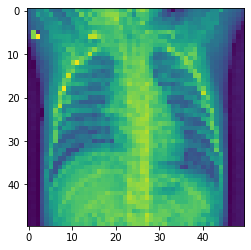

In [5]:
%matplotlib inline
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


t='CovidDataset/Train'
categories = ['Covid', 'Normal']

data = []
for i in categories:
  path= os.path.join(t, i)
  label= categories.index(i)

  for img in os.listdir(path):
    imgpath= os.path.join(path,img)
    img_cov= cv2.imread(imgpath,0)
    img_cov=cv2.resize(img_cov,(50,50))
    image=np.array(img_cov).flatten()
    data.append([image,label])

t='CovidDataset/Val'
categories = ['Covid', 'Normal']

for i in categories:
  path= os.path.join(t, i)
  label= categories.index(i)
  #print(label)

  for img in os.listdir(path):
    imgpath= os.path.join(path,img)
    img_cov= cv2.imread(imgpath,0)
    img_cov=cv2.resize(img_cov,(50,50))
    image=np.array(img_cov).flatten()
    data.append([image,label])

from sklearn.svm import SVC
random.shuffle(data)
features=[]
labels=[]

for feature, label in data:
  features.append(feature)
  labels.append(label)


xtrain, xtest, ytrain, ytest= train_test_split(features,labels,test_size=0.5)

model = SVC(C=1,kernel = 'poly', gamma = 'auto')
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

categories = ['Covid', 'Normal']

print("Accuracy:", accuracy)
print("Prediction is", categories[prediction[10]])

CovidDataset = xtest[0].reshape(50,50)
plt.imshow(CovidDataset)
plt.show()